In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,precision_score,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  

In [30]:
# load the dataset 
dataset=pd.read_csv("D:\ML\ML Assignment\Global_Pollution_Analysis.csv")
df=pd.DataFrame(dataset)

# Handle values
print(df.head())
print(df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())  # distance can't be zero or negative
print(df.info)
print(df.columns) 

        Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0       Hungary  2005               272.70                 124.27   
1     Singapore  2001                86.72                  60.34   
2       Romania  2016                91.59                  83.36   
3  Cook Islands  2018               280.61                  67.16   
4      Djibouti  2008               179.16                 127.53   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                 51.95                    94802.83   
1                117.22                    56283.92   
2                121.72                    56256.02   
3                 93.58                    74864.73   
4                121.55                    76862.06   

   Energy_Rec   overed (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                        158.14                   5.30                 41.11   
1                        498.04                   6.34                 36.44   
2             

In [31]:
print(df.columns)
scaler=StandardScaler()
df[["CO2_Emissions (in MT)","Industrial_Waste (in tons)"]]=scaler.fit_transform(df[["CO2_Emissions (in MT)","Industrial_Waste (in tons)"]])
print(df["CO2_Emissions (in MT)"])

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Rec   overed (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')
0     -1.356325
1     -1.284276
2      1.718910
3     -1.106232
4     -0.689181
         ...   
195   -1.387500
196    1.478517
197    0.940922
198    0.273086
199   -1.339005
Name: CO2_Emissions (in MT), Length: 200, dtype: float64


In [32]:
# Encode categorical 
df_encoded=pd.get_dummies(df,columns=['Country', 'Year'],drop_first=True,dtype=int)
print(df_encoded.columns)

Index(['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
       'Industrial_Waste (in tons)', 'Energy_Rec   overed (in GWh)',
       'CO2_Emissions (in MT)', 'Renewable_Energy (%)',
       'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       ...
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019'],
      dtype='object', length=204)


In [33]:
# Naive Bayes Classifier
#print(df.columns)
df["pollution_level"]=(df["Air_Pollution_Index"]+df["Soil_Pollution_Index"]+df["Water_Pollution_Index"])

low=df["pollution_level"].quantile(0.33)
high=df["pollution_level"].quantile(0.66)
df["pollution_Severity"]=pd.cut(
    df["pollution_level"],
    bins=[0,low,high,float("inf")],
    labels=[0,1,2]
)

encoded_countries = pd.get_dummies(df["Country"], drop_first=True)
X = pd.concat([df.drop(["Country", "Year","Industrial_Waste (in tons)","CO2_Emissions (in MT)"], axis=1), encoded_countries], axis=1)
Y=df["pollution_Severity"]





x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model=MultinomialNB()
model.fit(x_train,y_train)

pred=model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print("Precision:", precision_score(y_test, pred, average='weighted'))
print("Recall:", recall_score(y_test, pred, average='weighted'))
print("F1 Score:", f1_score(y_test, pred, average='weighted'))


0.4
[[ 5  6  1]
 [ 9 11  0]
 [ 5  3  0]]
Precision: 0.3539473684210527
Recall: 0.4
F1 Score: 0.3717741935483871


In [34]:
#K-Nearest Neighbors (KNN)


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Model=KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train,Y_train)
Result=Model.predict(X_test)



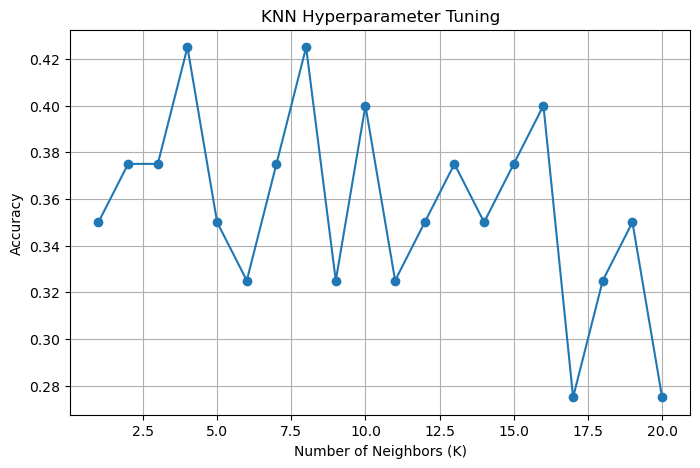

In [35]:
k_values = range(1, 21)
accuracies = []

# Train and evaluate KNN for each K
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Hyperparameter Tuning')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
#Evaluation Metrics:
ac=accuracy_score(Y_test,Result)
print(ac)

print("confusion_matrix:",confusion_matrix(Y_test,Result))
print("Precision:", precision_score(Y_test, Result, average='weighted'))
print("Recall:", recall_score(Y_test, Result, average='weighted'))
print("F1 Score:", f1_score(Y_test, Result, average='weighted'))


0.36666666666666664
confusion_matrix: [[11  5  1]
 [ 5  8 12]
 [12  3  3]]
Precision: 0.3758928571428572
Recall: 0.36666666666666664
F1 Score: 0.3540613210053669


In [ ]:
#Decision Tree
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
Dtmodel=DecisionTreeClassifier(random_state=42)
Dtmodel.fit(x_train,y_train)
Dtpred=Dtmodel.predict(x_test)



In [43]:
#Evaluation Metrics:
acc=accuracy_score(y_test,Dtpred)
print("Accuracy:",acc)

print("confusion_matrix:",confusion_matrix(y_test,Dtpred))
print("Precision:", precision_score(y_test, Dtpred, average='weighted'))
print("Recall:", recall_score(y_test, Dtpred, average='weighted'))
print("F1 Score:", f1_score(y_test, Dtpred, average='weighted'))


Accuracy: 0.975
confusion_matrix: [[12  0  0]
 [ 0 19  1]
 [ 0  0  8]]
Precision: 0.9777777777777779
Recall: 0.975
F1 Score: 0.9754147812971341


In [ ]:
#Model Comparison
print("Naive Bayes Classifier->")
#Evaluation Metrics:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print("Precision:", precision_score(y_test, pred, average='weighted'))
print("Recall:", recall_score(y_test, pred, average='weighted'))
print("F1 Score:", f1_score(y_test, pred, average='weighted'))

print("K-Nearest Neighbors (KNN)->")
#Evaluation Metrics:
ac=accuracy_score(Y_test,Result)
print(ac)
print("confusion_matrix:",confusion_matrix(Y_test,Result))
print("Precision:", precision_score(Y_test, Result, average='weighted'))
print("Recall:", recall_score(Y_test, Result, average='weighted'))
print("F1 Score:", f1_score(Y_test, Result, average='weighted'))

print("Decision Tree->")
#Evaluation Metrics:
acc=accuracy_score(y_test,Dtpred)
print("Accuracy:",acc)

print("confusion_matrix:",confusion_matrix(y_test,Dtpred))
print("Precision:", precision_score(y_test, Dtpred, average='weighted'))
print("Recall:", recall_score(y_test, Dtpred, average='weighted'))
print("F1 Score:", f1_score(y_test, Dtpred, average='weighted'))



Naive Bayes Classifier->
0.4
[[ 5  6  1]
 [ 9 11  0]
 [ 5  3  0]]
Precision: 0.3539473684210527
Recall: 0.4
F1 Score: 0.3717741935483871
K-Nearest Neighbors (KNN)->
0.36666666666666664
confusion_matrix: [[11  5  1]
 [ 5  8 12]
 [12  3  3]]
Precision: 0.3758928571428572
Recall: 0.36666666666666664
F1 Score: 0.3540613210053669
Decision Tree->
Accuracy: 0.975
confusion_matrix: [[12  0  0]
 [ 0 19  1]
 [ 0  0  8]]
Precision: 0.9777777777777779
Recall: 0.975
F1 Score: 0.9754147812971341


In [49]:
print("classification report of Naive Bayes Classifier"
  ,classification_report(y_test,pred))
print("classification report of K-Nearest Neighbors (KNN)"
  ,classification_report(Y_test,Result))
print("classification_report of Decision Tree",
      classification_report(y_test,Dtpred))


classification report of Naive Bayes Classifier               precision    recall  f1-score   support

           0       0.26      0.42      0.32        12
           1       0.55      0.55      0.55        20
           2       0.00      0.00      0.00         8

    accuracy                           0.40        40
   macro avg       0.27      0.32      0.29        40
weighted avg       0.35      0.40      0.37        40

classification report of K-Nearest Neighbors (KNN)               precision    recall  f1-score   support

           0       0.39      0.65      0.49        17
           1       0.50      0.32      0.39        25
           2       0.19      0.17      0.18        18

    accuracy                           0.37        60
   macro avg       0.36      0.38      0.35        60
weighted avg       0.38      0.37      0.35        60

classification_report of Decision Tree               precision    recall  f1-score   support

           0       1.00      1.00      1.00  

Naive Bayes Classifier->


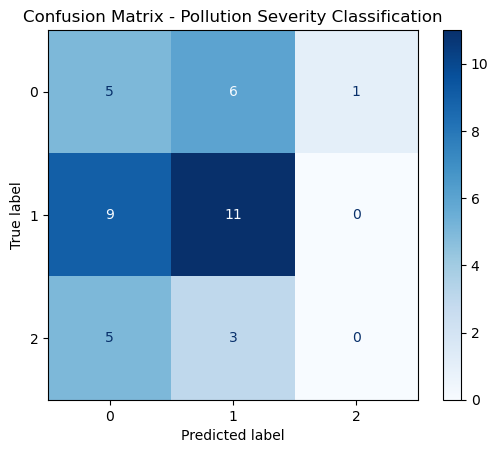

K-Nearest Neighbors (KNN)->


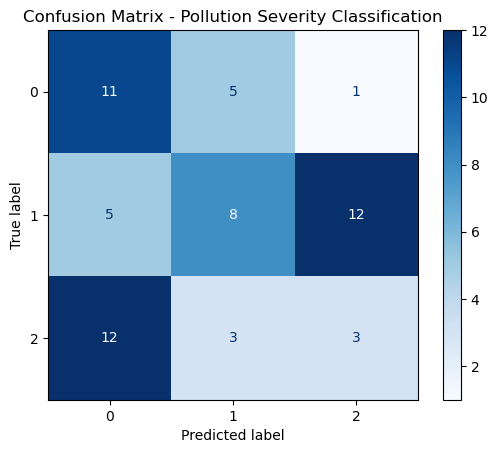

Decision Tree->


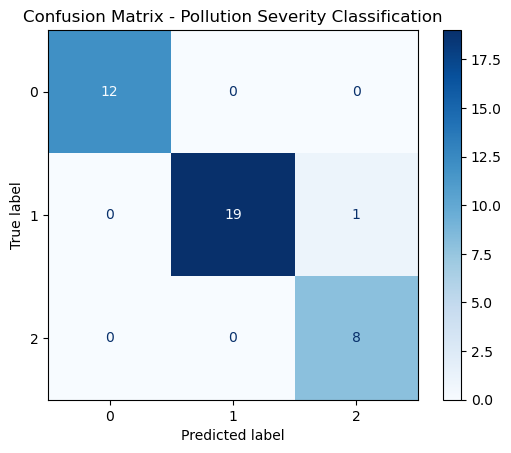

In [56]:
print("Naive Bayes Classifier->")

cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Pollution Severity Classification")
plt.show()


print("K-Nearest Neighbors (KNN)->")

cm = confusion_matrix(Y_test,Result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Pollution Severity Classification")
plt.show()

print("Decision Tree->")

cm = confusion_matrix(y_test,Dtpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Pollution Severity Classification")
plt.show()



Key Findings
Countries with high air pollution, CO₂ emissions, and industrial waste show high pollution severity.

Nations with higher renewable energy use and lower energy consumption per capita tend to have low pollution.

Energy recovery is higher in moderately polluted countries, showing waste-to-energy helps reduce pollution.

Decision Tree (tuned) gave the best performance, with Air_Pollution_Index and CO₂_Emissions as top features.

Policy Recommendations

Increase renewable energy adoption and waste-to-energy programs.

Enforce strict emission and waste regulations.

Promote green technologies and public awareness on pollution reduction.

models-
Naive Bayes Classifier->
0.4
[[ 5  6  1]
 [ 9 11  0]
 [ 5  3  0]]
Precision: 0.3539473684210527
Recall: 0.4
F1 Score: 0.3717741935483871
K-Nearest Neighbors (KNN)->
0.36666666666666664
confusion_matrix: [[11  5  1]
 [ 5  8 12]
 [12  3  3]]
Precision: 0.3758928571428572
Recall: 0.36666666666666664
F1 Score: 0.3540613210053669
Decision Tree->
Accuracy: 0.975
confusion_matrix: [[12  0  0]
 [ 0 19  1]
 [ 0  0  8]]
Precision: 0.9777777777777779
Recall: 0.975
F1 Score: 0.9754147812971341